In [13]:
from read_data import data_to_dataframe
from cleaning import clean_all
import pandas as pd
import matplotlib.pyplot as plt
from plot import *

In [2]:
df = data_to_dataframe()

In [3]:
df = clean_all(df)

In [4]:
tags_only_regions = tags_only_regions(df)

In [6]:
regionlist_counted_corrected_index = regionlist_counted_corrected_index(df)

In [8]:
a = get_dict_differences(tags_only_regions,regionlist_counted_corrected_index )

<BarContainer object of 15 artists>

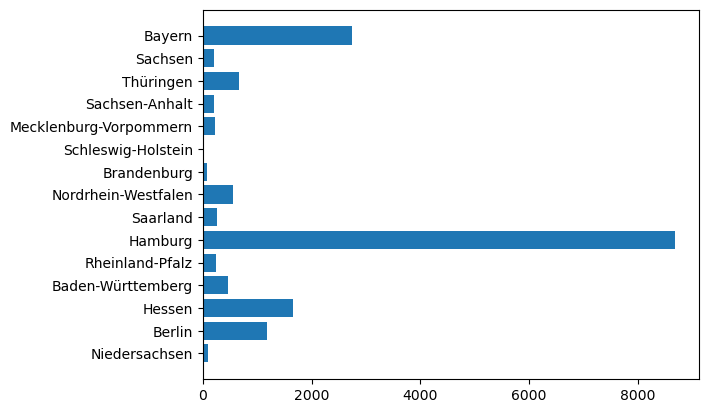

In [15]:
x_values = list(a.values())
y_values = list(a.keys())

# Plotting
plt.barh(y_values, x_values)

### Taglist but only regions

In [12]:
regiondict = {
  1: "Baden-Württemberg",
  2: "Bayern",
  3: "Berlin",
  4: "Brandenburg",
  5: "Bremen",
  6: "Hamburg",
  7: "Hessen",
  8: "Mecklenburg-Vorpommern",
  9: "Niedersachsen",
  10: "Nordrhein-Westfalen",
  11: "Rheinland-Pfalz",
  12: "Saarland",
  13: "Sachsen",
  14: "Sachsen-Anhalt",
  15: "Schleswig-Holstein",
  16: "Thüringen",
}

In [13]:
numberlist = [num for nums_list in df['regionIds'] if isinstance(nums_list, list) for num in nums_list]
numberlist_counted = pd.Series(numberlist).value_counts()

numberlist_counted.index = numberlist_counted.index.astype(int)

numberlist_counted.index = numberlist_counted.index.map(regiondict)

<Axes: >

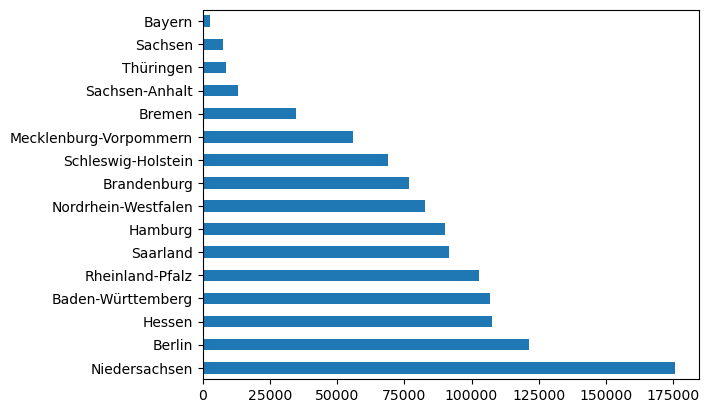

In [14]:
numberlist_counted.plot(kind='barh')

### RegionIds listed and plotted